<div align='center'><h1><b>Business Problem</b></h1></div>

<div align='center'>As a marketing agency,our primary objective is to maximize the return on investment(ROI) for our clients' advertising campaigns. We have conducted two ad campaigns, one on Facebook and the other on AdWords, and we need to determine which platform yields better results in terms of clicks, conversions and overall cost effectiveness. By identifying the most effective platform, we can allocate our resources more efficiently and optimize our advertising strategies to deliver better outcomes for our clients.</div>


<div align='center'><h1><b>Research Question</b></h1></div>

<div align='center'><b>Which Ad platform is more effectiv in terms of conversions clicks and overall cost effectiveness?</b></div>

In [2]:
# importing libraries
import pandas as pd
import numpy as np

# importing visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

import datetime as dt

# importing libraries for time series analysis
import scipy.stats as st
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.stattools import coint

# importing
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score , mean_squared_error

# imporing warnings library
import warnings
warnings.filterwarnings('ignore')

<div align='center'><h1><b>Data Description</b></h1></div>

The dataset comprises a collections of data comparing the performance of two separate ad campaigns conducted throughout the year 2019.Specifically the data covers a Facebook Ad campaign and an AdWords Ad campaign. For each day of the year 2019, there is a corresponding row in the dataset, resulting a total of 365 lines of campaign data to analysis. The dataset includes various performance metrics for each ad campaign, providing insights into their effectiveness and efficiency over time.

key features includes in the datasets are as follows:
- Date : The date corresponding to each row of campaign data, ranging from january 1st 2019, to December 31st 2019.
- Ad Views : The numbers of times the ad was viewed.
- Ad Clicks : The numbers of clicks recevied on the ad.
- Ad Conversions : The numbers of conversions resulting from the ad
- Cost per Ad : The cost associated with running the Facebook ad campaign.
- Click Through Rate : The ratio of clicks to views, indicating the effectiveness of the ad in generating clicks.
- Conversions Rate : The ratio of conversions to clicks, reflecting the effectiveness of the ad in driving desired actions.
- Cost per Clicks : The average cost incurred per click on the ad.

In [5]:
# loading the dataset marketing campaign of facebook and adwords
df = pd.read_csv(r"marketing_campaign.csv",sep=',')
df.head()

,Date,Facebook Ad Campaign,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks),AdWords Ad Campaign,AdWords Ad Views,AdWords Ad Clicks,AdWords Ad Conversions,Cost per AdWords Ad,AdWords Click-Through Rate (Clicks / View),AdWords Conversion Rate (Conversions / Click),AdWords Cost per Click (Ad Cost / Clicks)
0,1/1/2019,FB_Jan19,2116,18,8,$126,0.83%,42.73%,$7.14,AW_Jan19,4984,59,5,$194,1.18%,8.40%,$3.30
1,1/2/2019,FB_Jan19,3106,36,12,$104,1.15%,34.04%,$2.91,AW_Jan19,4022,71,6,$75,1.77%,7.80%,$1.05
2,1/3/2019,FB_Jan19,3105,26,8,$102,0.84%,31.45%,$3.89,AW_Jan19,3863,44,4,$141,1.13%,9.59%,$3.23
3,1/4/2019,FB_Jan19,1107,27,9,$71,2.45%,34.76%,$2.62,AW_Jan19,3911,49,5,$141,1.26%,11.08%,$2.86
4,1/5/2019,FB_Jan19,1317,15,7,$78,1.10%,47.59%,$5.38,AW_Jan19,4070,55,7,$133,1.36%,12.22%,$2.40


In [25]:
# rows and columns in dataset
df.shape

(365, 17)

In [27]:
# getting information about the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 17 columns):
 #   Column                                           Non-Null Count  Dtype 
---  ------                                           --------------  ----- 
 0   Date                                             365 non-null    object
 1   Facebook Ad Campaign                             365 non-null    object
 2   Facebook Ad Views                                365 non-null    int64 
 3   Facebook Ad Clicks                               365 non-null    int64 
 4   Facebook Ad Conversions                          365 non-null    int64 
 5   Cost per Facebook Ad                             365 non-null    object
 6   Facebook Click-Through Rate (Clicks / View)      365 non-null    object
 7   Facebook Conversion Rate (Conversions / Clicks)  365 non-null    object
 8   Facebook Cost per Click (Ad Cost / Clicks)       365 non-null    object
 9   AdWords Ad Campaign                        

In [29]:
# checking for null results
df.isnull().sum()

Date                                               0
Facebook Ad Campaign                               0
Facebook Ad Views                                  0
Facebook Ad Clicks                                 0
Facebook Ad Conversions                            0
Cost per Facebook Ad                               0
Facebook Click-Through Rate (Clicks / View)        0
Facebook Conversion Rate (Conversions / Clicks)    0
Facebook Cost per Click (Ad Cost / Clicks)         0
AdWords Ad Campaign                                0
AdWords Ad Views                                   0
AdWords Ad Clicks                                  0
AdWords Ad Conversions                             0
Cost per AdWords Ad                                0
AdWords Click-Through Rate (Clicks / View)         0
AdWords Conversion Rate (Conversions / Click)      0
AdWords Cost per Click (Ad Cost / Clicks)          0
dtype: int64

In [31]:
# checking for duplicates results
df.duplicated().sum()

0

#### Data Transformation

In [34]:
# changing the data type of date column to datetime
df['Date'] = pd.to_datetime(df['Date'])

In [36]:
# converting object data type of columns to float data type

# Facebook columns
df['Cost per Facebook Ad'] =  df['Cost per Facebook Ad'].str.replace('$','').astype('float')
df['Facebook Cost per Click (Ad Cost / Clicks)'] =  df['Facebook Cost per Click (Ad Cost / Clicks)'].str.replace('$','').astype('float')
df['Facebook Click-Through Rate (Clicks / View)'] =  df['Facebook Click-Through Rate (Clicks / View)'].str.replace('%','').astype('float')
df['Facebook Conversion Rate (Conversions / Clicks)'] =  df['Facebook Conversion Rate (Conversions / Clicks)'].str.replace('%','').astype('float')

# AdWords columns
df['Cost per AdWords Ad'] =  df['Cost per AdWords Ad'].str.replace('$','').astype('float')
df['AdWords Cost per Click (Ad Cost / Clicks)'] =  df['AdWords Cost per Click (Ad Cost / Clicks)'].str.replace('$','').astype('float')
df['AdWords Click-Through Rate (Clicks / View)'] =  df['AdWords Click-Through Rate (Clicks / View)'].str.replace('%','').astype('float')
df['AdWords Conversion Rate (Conversions / Click)'] =  df['AdWords Conversion Rate (Conversions / Click)'].str.replace('%','').astype('float')


In [38]:
# descriptive statistics of the data
df.describe().T

,count,mean,min,25%,50%,75%,max,std
Date,365,2019-07-02 00:00:00,2019-01-01 00:00:00,2019-04-02 00:00:00,2019-07-02 00:00:00,2019-10-01 00:00:00,2019-12-31 00:00:00,NaN
Facebook Ad Views,365.0,2179.687671,1050.0,1656.0,2202.0,2717.0,3320.0,618.074639
Facebook Ad Clicks,365.0,44.049315,15.0,35.0,43.0,54.0,73.0,12.140559
Facebook Ad Conversions,365.0,11.742466,5.0,10.0,12.0,13.0,19.0,2.924786
Cost per Facebook Ad,365.0,87.780822,34.0,63.0,88.0,111.0,144.0,28.263014
Facebook Click-Through Rate (Clicks / View),365.0,2.201288,0.83,1.49,2.0,2.67,5.37,0.933193
Facebook Conversion Rate (Conversions / Clicks),365.0,27.153288,21.48,23.8,26.77,28.97,47.59,4.165921
Facebook Cost per Click (Ad Cost / Clicks),365.0,2.187808,0.61,1.41,2.02,2.76,7.14,1.04082
AdWords Ad Views,365.0,4717.19726,3714.0,4247.0,4711.0,5190.0,5760.0,561.11406
AdWords Ad Clicks,365.0,60.383562,31.0,49.0,60.0,73.0,89.0,14.368225


<div align='center'><h1><b>Exploratory Data Analysis(EDA)</b></h1></div>

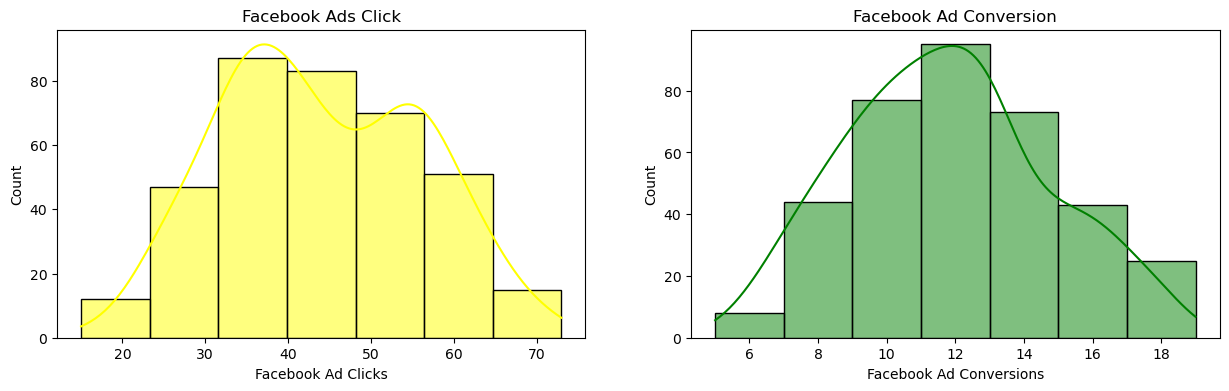

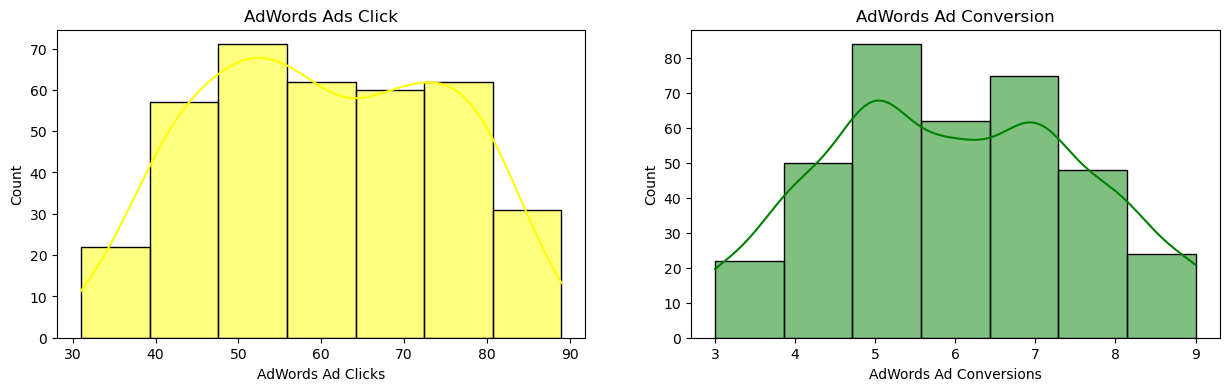

In [42]:
# Visualization representation of Clicks and Conversions of Facebook and AdWords

plt.figure(figsize=(15,4))

# Facebook clicks and Conversion
plt.subplot(1,2,1)
sns.histplot(df['Facebook Ad Clicks'],color='yellow',kde=True,bins=7)
plt.title('Facebook Ads Click')

plt.subplot(1,2,2)
sns.histplot(df['Facebook Ad Conversions'],color='green',kde=True,bins=7)
plt.title('Facebook Ad Conversion')
plt.show()


plt.figure(figsize=(15,4))

# AdWords Clicks and Conversions
plt.subplot(1,2,1)
sns.histplot(df['AdWords Ad Clicks'],color='yellow',kde=True,bins=7)
plt.title('AdWords Ads Click')

plt.subplot(1,2,2)
sns.histplot(df['AdWords Ad Conversions'],color='green',kde=True,bins=7)
plt.title('AdWords Ad Conversion')
plt.show()

**All histogram showing somewhat uniformaly distributed data. The symmetrical shape suggests that the numbers of clicks and conversion is evenly distributed.**

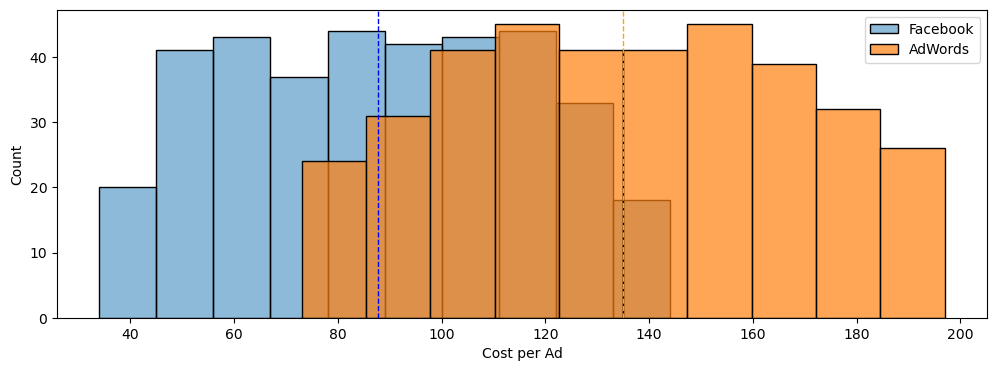

In [46]:
# Visualization representation of Cost per Ad for Facebook and AdWords  
plt.figure(figsize=(12,4))
sns.histplot(df['Cost per Facebook Ad'],alpha=0.5,bins=10,label='Facebook')
sns.histplot(df['Cost per AdWords Ad'],alpha=0.7,bins=10,label='AdWords')

plt.axvline(df['Cost per Facebook Ad'].mean(), color='blue', linestyle='dashed', linewidth=1)
plt.axvline(df['Cost per AdWords Ad'].mean(), color='orange', linestyle='dashed', linewidth=1)


plt.legend()
plt.xlabel('Cost per Ad')
plt.show()

**Cost per ad spend range of Facebook is 35-145 while cost per ad spend on AdWords is 75-195**

**Cost per Ad spend on Facebook on average is around 90 while for AdWords is around 132 average**


In [50]:
# creating category column based on conversions for facebook and adwords

def conversion_category(category_col):
    category=[]
    for i in df[category_col]:
        if i <6:
            category.append('less than 6')
        elif 6<=i<11:
            category.append('6-10')
        elif 11<=i<16:
            category.append('11-15')
        else:
            category.append('more than 15')
    return category


df['Facebook Ad Conversions category'] = conversion_category('Facebook Ad Conversions')
df['AdWords Ad Conversions category'] = conversion_category('AdWords Ad Conversions')

In [52]:
# creating dataframe for facebook category value counts
Facebook = pd.DataFrame(df['Facebook Ad Conversions category'].value_counts()).reset_index().rename(columns=
                                                                                                    {'Facebook Ad Conversions category':'Category'})
Facebook

,Category,count
0,11-15,189
1,6-10,128
2,more than 15,47
3,less than 6,1


In [54]:
# creating dataframe for AdWords category value count
AdWords = pd.DataFrame(df['AdWords Ad Conversions category'].value_counts()).reset_index().rename(columns = 
                                                                                                  {'AdWords Ad Conversions category':'Category'})
AdWords

,Category,count
0,6-10,209
1,less than 6,156


In [56]:
# merging both facebook and adwords value counts dataframes
category_df = pd.merge(Facebook,AdWords,on='Category',how='outer',suffixes=('_Facebook','_AdWords')).fillna(0)
category_df 

,Category,count_Facebook,count_AdWords
0,11-15,189,0.0
1,6-10,128,209.0
2,less than 6,1,156.0
3,more than 15,47,0.0


In [58]:
# rearanging rows based on Category column
category_df = category_df.iloc[[2,1,0,3]]
category_df

,Category,count_Facebook,count_AdWords
2,less than 6,1,156.0
1,6-10,128,209.0
0,11-15,189,0.0
3,more than 15,47,0.0


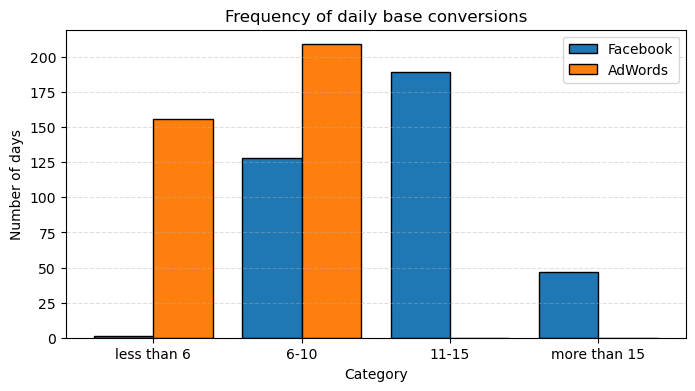

In [60]:
# visualization representation of daily based conversions by category
X_axis = np.arange(len(category_df))

plt.figure(figsize=(8,4))
plt.bar(X_axis-0.2 , category_df['count_Facebook'],0.4,label='Facebook',linewidth=1,edgecolor='k')
plt.bar(X_axis+0.2 , category_df['count_AdWords'],0.4,label='AdWords',linewidth=1,edgecolor='k')


plt.xticks(X_axis,category_df['Category'])
plt.xlabel('Category')
plt.ylabel('Number of days')
plt.title('Frequency of daily base conversions')
plt.grid(axis='y',linestyle='--',alpha=0.4)
plt.legend()

plt.show()

**For Facebook Conversion rate is higher than AdWords as for AdWords conversion rate is lower which is less than 6 or 6-10.**

**There is significant variance in the number of the high conversion  days between both platforms**

**For AdWords lower conversion rate we need to see the what factors or strategies are affecting for lower conversion rate.**

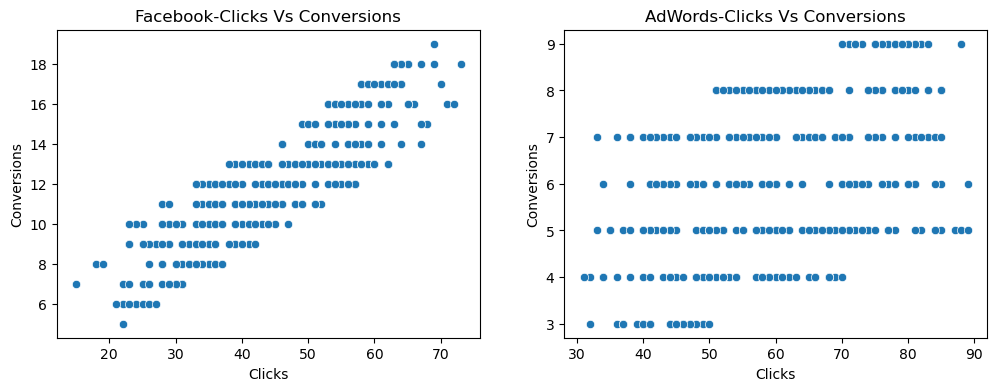

In [64]:
# visualization representation of facebook and adwords clicks Vs conversions
plt.figure(figsize=(12,4))

# Facebook clicks vs Conversions
plt.subplot(1,2,1)
sns.scatterplot(df,x = df['Facebook Ad Clicks'],y = df['Facebook Ad Conversions'])
plt.title('Facebook-Clicks Vs Conversions')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

# AdWords clicks vs Conversions
plt.subplot(1,2,2)
sns.scatterplot(df,x = df['AdWords Ad Clicks'],y = df['AdWords Ad Conversions'])
plt.title('AdWords-Clicks Vs Conversions')
plt.xlabel('Clicks')
plt.ylabel('Conversions')

plt.show()

**Facebook Clicks and Conversion follow kind of linear relationship**

In [67]:
# correaltion metrics for facebook clicks and conversions
facebook_corr = df[['Facebook Ad Clicks','Facebook Ad Conversions']].corr()
facebook_corr

,Facebook Ad Clicks,Facebook Ad Conversions
Facebook Ad Clicks,1.000000,0.873775
Facebook Ad Conversions,0.873775,1.000000


In [69]:
# correaltion metrics for adwords clicks and conversions
adwords = df[['AdWords Ad Clicks','AdWords Ad Conversions']].corr()
adwords

,AdWords Ad Clicks,AdWords Ad Conversions
AdWords Ad Clicks,1.000000,0.447993
AdWords Ad Conversions,0.447993,1.000000


**Facebook clicks and conversion rate show highly positive linear relationship 0.87. The strong correaltion shows that Facebook Ads are highly effective in dirving Sales.**

**AdWords clicks and conversion rate show moderate positive linear relationship 0.43. The moderate correlation shows AdWords Ads does contributes to sells but not efficiently as Facebooks Ads**

<div align='center'><h1><b>Hypothesis Testing</b></h1></div>

**Hypothesis :** Advertising on Facebook will result in greater number of conversion compared to advertising on AdWords 

**Null Hypothesis (H0) :** There is no difference in the number of conversion between Facebook and AdsWords or the number of conversions from AdWords is greater or equal to Facebook

**Alternative Hypothesis (H1)** The number of conversions from Facebook is greater than the number of conversion from AdWords 

In [77]:
print('For' ,round(df['Facebook Ad Clicks'].mean(),2),'clicks on Facebook we get', round(df['Facebook Ad Conversions'].mean(),2),'Conversions\n')
print('For' ,round(df['AdWords Ad Clicks'].mean(),2), 'clicks on AdWords we get',round(df['AdWords Ad Conversions'].mean(),2),'Conversions')

For 44.05 clicks on Facebook we get 11.74 Conversions

For 60.38 clicks on AdWords we get 5.98 Conversions


In [79]:
# performing t test on data of facebook and adwords ad conversions
t_stat , p_value = st.ttest_ind(df['Facebook Ad Conversions'],df['AdWords Ad Conversions'],equal_var=False)
print('p_value is :',p_value)

if p_value<0.5:
    print('We Reject the Null Hypothesis')
else:
    print('We Failed to Reject the Null Hypothesis')

p_value is : 9.348918164530465e-134
We Reject the Null Hypothesis


<b><p>As the p-value is less than 0.05, we reject the null hypothesis. This indicates a significant difference in the number of conversions between Facebook Ads and AdWords Ads.

Based on this hypothesis testing and the visualizations, we can conclude that Facebook Ads are more effective in driving sales.

The analysis provides sufficient evidence to support that advertising on Facebook results in a greater number of conversions compared to advertising on AdWords. This suggests that, under the conditions of this study, Facebook advertising is more effective for driving conversions.</p></b>

<div align='center'><h1><b>Regression Analysis</b></h1></div>

### Regression Model to Predict Conversions Based on Clicks

### Overview
A regression model was developed to predict the number of conversions based on the number of clicks received. This model aims to help evaluate and optimize ad performance by providing actionable insights into the relationship between clicks and conversions.

### Model Details
- **Type of Model**: Linear Regression
- **Input Variable (Feature)**: Number of Clicks
- **Output Variable (Target)**: Number of Conversions
- **Evaluation Metric**: Accuracy (R² score)

In [85]:
# creating regresssion model for facebook 
x = df[['Facebook Ad Clicks']]

y=df['Facebook Ad Conversions']

lr = LinearRegression()
model = lr.fit(x , y)
y_pred = model.predict(x)


r2 = r2_score(y,y_pred)*100
mse = mean_squared_error(y,y_pred)
print('R2 Score is :' , round(r2,2),'%')
print('Mean Square Error : ',round(mse,2))

R2 Score is : 76.35 %
Mean Square Error :  2.02


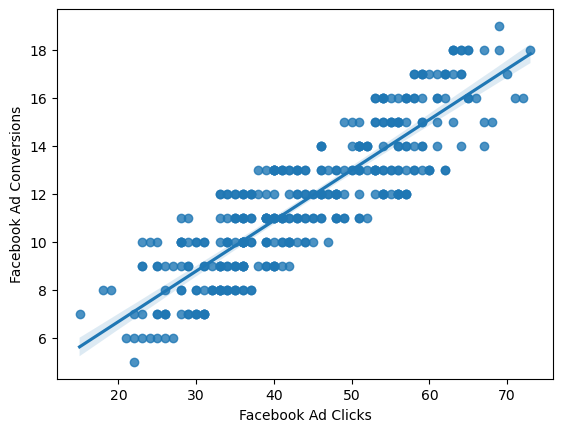

In [87]:
# visualization representation of facebook ads clicks and conversion data and predicted line
sns.regplot(x=df['Facebook Ad Clicks'],y=df['Facebook Ad Conversions'])
plt.show()

### Model Performance
- **Accuracy**: The model achieved an accuracy of approximately **76.35%**, indicating that 76.35% of the variability in conversions can be explained by the number of clicks.
- **Error Analysis**: While the model shows reasonable predictive power, there is still room for improvement, particularly in capturing additional factors influencing conversions.

### Key Insights
- **Positive Correlation**: The model suggests a positive relationship between clicks and conversions, which aligns with expectations.
- **Practical Use**: Businesses can use this model to estimate conversions based on expected click volumes, enabling better ad campaign planning and budget allocation.

### Limitations and Future Work
1. **Additional Features**: Incorporating other variables such as ad type, time of day, or audience demographics could improve accuracy.
2. **Non-Linear Patterns**: If the relationship between clicks and conversions is not strictly linear, a more complex model (e.g., polynomial regression, random forest) may be considered.
3. **Generalizability**: The model's performance should be validated on additional datasets to ensure its robustness across different campaigns.

### Conclusion
The regression model provides a useful starting point for predicting conversions based on clicks, with an accuracy of 76.35%. However, further refinement and inclusion of more features could enhance its predictive power.


## Predicting Model

In [93]:
# Predicting model
def prediction(clicks):
    value = model.predict([[clicks]])
    return print(f"converions rate for {clicks} clicks will be around {value}")

In [95]:
prediction(35)

converions rate for 35 clicks will be around [9.83757203]


<div align='center'><h2><b>Analyzing Facebook Campaign metrics over time</b></h2></div>

In [98]:
# creating new dataframe of facebook data
new_df = df[['Date','Facebook Ad Views' , 'Facebook Ad Clicks','Facebook Ad Conversions', 'Cost per Facebook Ad',
             'Facebook Click-Through Rate (Clicks / View)','Facebook Conversion Rate (Conversions / Clicks)','Facebook Cost per Click (Ad Cost / Clicks)']]

In [100]:
new_df.head(2)

,Date,Facebook Ad Views,Facebook Ad Clicks,Facebook Ad Conversions,Cost per Facebook Ad,Facebook Click-Through Rate (Clicks / View),Facebook Conversion Rate (Conversions / Clicks),Facebook Cost per Click (Ad Cost / Clicks)
0,2019-01-01,2116,18,8,126.0,0.83,42.73,7.14
1,2019-01-02,3106,36,12,104.0,1.15,34.04,2.91


In [102]:
# extracting month and weekday from date column of data
new_df['Month'] = new_df['Date'].dt.month
new_df['Week'] = new_df['Date'].dt.weekday

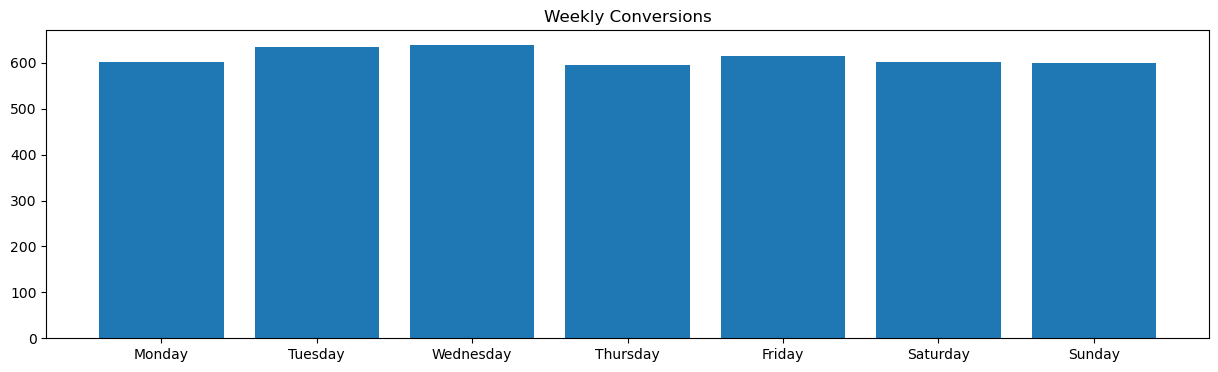

In [104]:
# visualization representation of weekly conversions
plt.figure(figsize=(15,4))

weekly_conversion = new_df.groupby('Week')[['Facebook Ad Conversions']].sum()
week_days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
plt.bar(week_days,weekly_conversion['Facebook Ad Conversions'])
plt.title('Weekly Conversions')
plt.show()


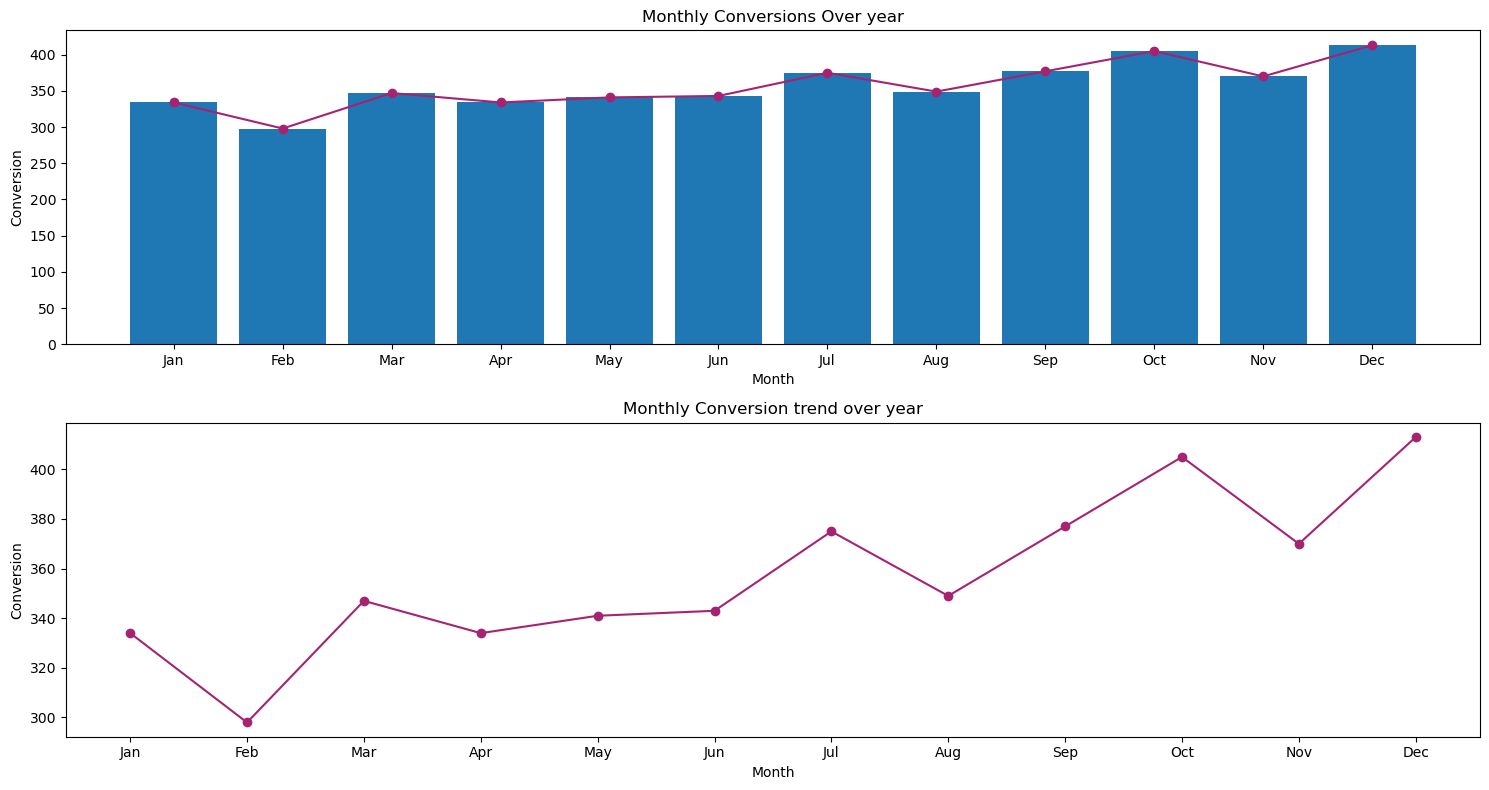

In [120]:
# visualization representation of monthly conversions
plt.figure(figsize=(15,8))

monthly_conversion = new_df.groupby('Month')[['Facebook Ad Conversions']].sum()
month_name= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

plt.subplot(2,1,1)
plt.title('Monthly Conversions Over year')

plt.bar(month_name,monthly_conversion['Facebook Ad Conversions'])
plt.plot(month_name,monthly_conversion['Facebook Ad Conversions'],color='#A62372',marker="o")
plt.xlabel('Month')
plt.ylabel('Conversion')

plt.subplot(2,1,2)
plt.plot(month_name,monthly_conversion['Facebook Ad Conversions'],color='#A62372',marker="o")
plt.xlabel('Month')
plt.ylabel('Conversion')
plt.title('Monthly Conversion trend over year')

plt.tight_layout()
plt.show()

<b><p>Across the weekdays over a year, conversions remain relatively consistent. However, conversions on Tuesdays and Wednesdays are slightly higher compared to other days.

Across the months over a year, conversions exhibit fluctuations. February records the lowest conversions among all months. Additionally, February, April, August, and November show a noticeable decline in conversions.</p></b>

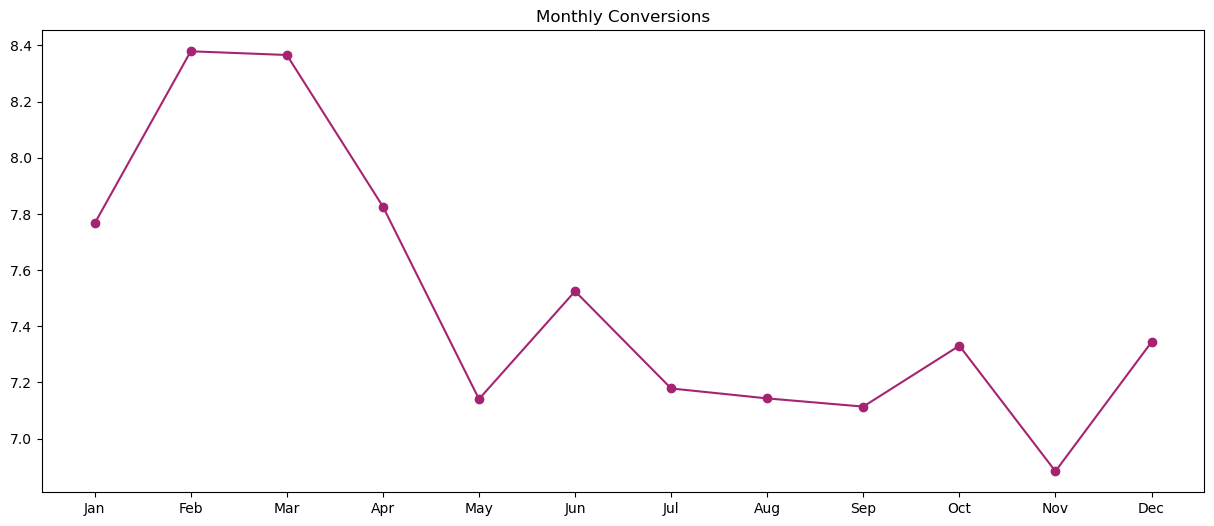

In [212]:
# Cost per conversion trend Over Time visual representaion 
plt.figure(figsize=(15,6))

monthly_conversion = new_df.groupby('Month')[['Facebook Ad Conversions','Cost per Facebook Ad']].sum()
month_name= ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
monthly_conversion['Cost per Conversion'] = monthly_conversion['Cost per Facebook Ad']/monthly_conversion['Facebook Ad Conversions']

plt.plot(month_name,monthly_conversion['Cost per Conversion'],color='#A62372',marker="o")
plt.xlabel('Average cost of ad')
plt.title('Avearge cost of Conversions')
plt.show()


<b><p>The average cost of ads is highest in February and March, which correspond to the least effective conversion rates during these months.

Conversely, the average cost of ads is lower in May, July, August, September, and November, indicating these months are more effective for ad conversions. Among these, November stands out as the most effective month, with the lowest cost per ad conversion.

Based on this analysis, allocating more budget to these months can optimize ad performance and improve conversion efficiency.</p></b>

**Is there a long term realtionship between adverstising spend and conversion rates suggest a stable, proportional impact of budget changes on conversion over time?**

**Null Hypothesis (H₀):** There is no long-term relationship between advertising spend and conversion rates.

**Alternative Hypothesis (H₁):** There is a long-term relationship between advertising spend and conversion rates, suggesting a stable, proportional impact of budget changes on conversions over time.

In [216]:
# performing cointegration test for cost per facebook ad and conversions

score ,p_value,_ = coint(df['Cost per Facebook Ad'],df['Facebook Ad Conversions'])
print('Cointegration test score',score)
print('P Value ',p_value)

if p_value<0.5:
    print('We Reject the Null Hypothesis')
else:
    print('We Failed to Reject the Null Hypothesis')

Cointegration test score -14.755428385103222
P Value  2.133737597906117e-26
We Reject the Null Hypothesis


<b><p>This analysis provides sufficient evidence to support the presence of a long-term relationship between advertising spend and conversion rates. The results indicate that changes in the advertising budget have a stable and proportional impact on conversions over time.

However, it is important to account for external factors (e.g., market conditions, seasonality, and audience behavior) that might influence this relationship. Further validation and a more granular analysis can provide deeper insights into the dynamics of advertising spend and conversion rates.</p></b>